In [ ]:
import pandas as pd

In [ ]:
import numpy as np

In [19]:
import networkx as nx
from networkx.algorithms import community

In [54]:
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('~/Downloads/OnlineLearning_1.csv')

In [ ]:
df.set_index(df['user_id'])

In [ ]:
adj_matrix = pd.crosstab(df['user_id'].dropna().astype(int),df['reply_to_user_id'].dropna().astype(int))

In [ ]:
idx = adj_matrix.columns.union(adj_matrix.index)
adj_matrix = adj_matrix.reindex(index = idx, columns=idx, fill_value=0)

In [16]:
graph = nx.from_pandas_adjacency(adj_matrix,create_using=nx.path_graph(10))

In [58]:
np.array(list(nx.average_neighbor_degree(graph).values())).mean()

1.3654233261932225

In [63]:
nx.number_connected_components(graph)

623

In [68]:
nx.local_efficiency(graph)

0.01621251441753172

In [71]:
nx.global_efficiency(graph)

0.0009661618658158458

In [73]:
nx.degree_histogram(graph)

[0, 864, 257, 20, 7, 3, 2, 2, 0, 1]

In [76]:
nx.density(graph)

0.0011354274330052877

In [77]:
nx.info(graph)

'Name: \nType: Graph\nNumber of nodes: 1156\nNumber of edges: 758\nAverage degree:   1.3114'

Community analysis using Girvan-Newman Algorithm

In [22]:
comp = community.girvan_newman(graph)

In [28]:
communities = list(sorted(c) for c in next(comp))

In [35]:
sorted_communities = sorted(communities,key=len,reverse=True)

In [45]:
communities_distr = [len(x) for x in sorted_communities]

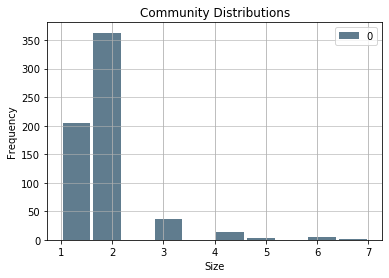

In [55]:
pd.DataFrame(communities_distr).plot.hist(grid=True, rwidth=0.9, color='#607c8e')
plt.title('Community Distributions')
plt.xlabel('Size')
plt.grid(axis='y', alpha=0.75)